In [1]:
import sys
sys.path.append('../..')

In [2]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns

In [3]:
from core.getdata import *
from core.dataset import *
from core.dataset2 import * 
from core.network import *
from core.trainer import *
from core.visualization import *

In [4]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
size = 1288 # replicated

In [6]:
data1 = DatasetSplit(ligands, polarization, 1, size, scale=True)
data2 = DatasetSplit(ligands, polarization, 2, size, scale=True)

In [7]:
data1.data.shape

(61824, 98, 1)

In [8]:
train1, val1 = torch.utils.data.random_split(data1, [55640, 6184])
train2, val2 = torch.utils.data.random_split(data2, [55640, 6184])

In [9]:
trainloader1 = torch.utils.data.DataLoader(train1, batch_size=64, shuffle=True)
valloader1 = torch.utils.data.DataLoader(val1, batch_size=64, shuffle=True)

trainloader2 = torch.utils.data.DataLoader(train2, batch_size=64, shuffle=True)
valloader2 = torch.utils.data.DataLoader(val2, batch_size=64, shuffle=True)

In [10]:
# hyperparameters
input_size = 1
hidden_size = 98
output_size = 9

lr = 0.001
epochs = 70
batch_size = 64

device = torch.device('cuda')

In [11]:
net = LSTM(input_size=input_size, hidden_sizes=hidden_size, output_size=output_size, num_layers=1, device=device)

In [12]:
net.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=9, bias=True)
)

In [13]:
trainer = LSTMTrainer(model=net, device=device)

In [14]:
trainer.train(trainloader1, valloader1, batch_size=batch_size, n_epochs=epochs)

  1%|█▏                                                                                 | 1/70 [00:05<06:10,  5.37s/it]

Epoch 001: | Training Loss: 2.070800005704507 | Validation Loss: 2.0642375393012133


  3%|██▎                                                                                | 2/70 [00:09<05:27,  4.82s/it]

Epoch 002: | Training Loss: 2.0520133952984865 | Validation Loss: 2.03788347588372


  4%|███▌                                                                               | 3/70 [00:14<05:11,  4.65s/it]

Epoch 003: | Training Loss: 2.037758028918299 | Validation Loss: 2.02359944274745


  6%|████▋                                                                              | 4/70 [00:18<05:01,  4.57s/it]

Epoch 004: | Training Loss: 1.8427101275016522 | Validation Loss: 1.8343053134446292


  7%|█████▉                                                                             | 5/70 [00:23<04:55,  4.54s/it]

Epoch 005: | Training Loss: 1.8216342868476079 | Validation Loss: 1.686941526599766


  9%|███████                                                                            | 6/70 [00:27<04:48,  4.51s/it]

Epoch 006: | Training Loss: 1.6649443600369596 | Validation Loss: 1.6287901241754748


 10%|████████▎                                                                          | 7/70 [00:32<04:43,  4.50s/it]

Epoch 007: | Training Loss: 1.6263711621021402 | Validation Loss: 1.6326705942448883


 11%|█████████▍                                                                         | 8/70 [00:36<04:37,  4.48s/it]

Epoch 008: | Training Loss: 1.5914286564136373 | Validation Loss: 1.5731431282672685


 13%|██████████▋                                                                        | 9/70 [00:41<04:33,  4.49s/it]

Epoch 009: | Training Loss: 1.5456798072518974 | Validation Loss: 1.5330486371345127


 14%|███████████▋                                                                      | 10/70 [00:45<04:28,  4.48s/it]

Epoch 010: | Training Loss: 1.5068256190453453 | Validation Loss: 1.486750671544026


 16%|████████████▉                                                                     | 11/70 [00:49<04:24,  4.48s/it]

Epoch 011: | Training Loss: 1.4837353047283217 | Validation Loss: 1.4587144581312985


 17%|██████████████                                                                    | 12/70 [00:54<04:19,  4.47s/it]

Epoch 012: | Training Loss: 1.462569361856614 | Validation Loss: 1.4516606134237702


 19%|███████████████▏                                                                  | 13/70 [00:58<04:14,  4.46s/it]

Epoch 013: | Training Loss: 1.4471627097020203 | Validation Loss: 1.4642734490719038


 20%|████████████████▍                                                                 | 14/70 [01:03<04:10,  4.47s/it]

Epoch 014: | Training Loss: 1.4311283854232437 | Validation Loss: 1.4128389653471327


 21%|█████████████████▌                                                                | 15/70 [01:07<04:05,  4.46s/it]

Epoch 015: | Training Loss: 1.4138621056901997 | Validation Loss: 1.395511235158468


 23%|██████████████████▋                                                               | 16/70 [01:12<04:00,  4.46s/it]

Epoch 016: | Training Loss: 1.439615534091818 | Validation Loss: 1.4100649590344774


 24%|███████████████████▉                                                              | 17/70 [01:16<03:56,  4.46s/it]

Epoch 017: | Training Loss: 1.3925745458438479 | Validation Loss: 1.3789708417715485


 26%|█████████████████████                                                             | 18/70 [01:21<03:53,  4.48s/it]

Epoch 018: | Training Loss: 1.3797691600076083 | Validation Loss: 1.36780677382479


 27%|██████████████████████▎                                                           | 19/70 [01:25<03:48,  4.47s/it]

Epoch 019: | Training Loss: 1.3712172241046512 | Validation Loss: 1.3792050474697781


 29%|███████████████████████▍                                                          | 20/70 [01:30<03:43,  4.48s/it]

Epoch 020: | Training Loss: 1.358285365022462 | Validation Loss: 1.3437655623426144


 30%|████████████████████████▌                                                         | 21/70 [01:34<03:39,  4.47s/it]

Epoch 021: | Training Loss: 1.3445870541978155 | Validation Loss: 1.3339241632481211


 31%|█████████████████████████▊                                                        | 22/70 [01:39<03:34,  4.46s/it]

Epoch 022: | Training Loss: 1.3326194921444203 | Validation Loss: 1.3277145452106123


 33%|██████████████████████████▉                                                       | 23/70 [01:43<03:29,  4.46s/it]

Epoch 023: | Training Loss: 1.3213330802561223 | Validation Loss: 1.316149925448231


 34%|████████████████████████████                                                      | 24/70 [01:48<03:25,  4.47s/it]

Epoch 024: | Training Loss: 1.3106507430816519 | Validation Loss: 1.3135873718360036


 36%|█████████████████████████████▎                                                    | 25/70 [01:52<03:21,  4.48s/it]

Epoch 025: | Training Loss: 1.302079821044001 | Validation Loss: 1.3341405219638471


 37%|██████████████████████████████▍                                                   | 26/70 [01:57<03:17,  4.48s/it]

Epoch 026: | Training Loss: 1.3197815377821867 | Validation Loss: 1.3670478309552694


 39%|███████████████████████████████▋                                                  | 27/70 [02:01<03:12,  4.48s/it]

Epoch 027: | Training Loss: 1.302424966466838 | Validation Loss: 1.2871953765141595


 40%|████████████████████████████████▊                                                 | 28/70 [02:05<03:08,  4.48s/it]

Epoch 028: | Training Loss: 1.2733463748433125 | Validation Loss: 1.295618327622561


 41%|█████████████████████████████████▉                                                | 29/70 [02:10<03:03,  4.47s/it]

Epoch 029: | Training Loss: 1.2640197104421156 | Validation Loss: 1.2776680336785071


 43%|███████████████████████████████████▏                                              | 30/70 [02:14<02:58,  4.47s/it]

Epoch 030: | Training Loss: 1.2585557640283958 | Validation Loss: 1.2772407120036096


 44%|████████████████████████████████████▎                                             | 31/70 [02:19<02:54,  4.47s/it]

Epoch 031: | Training Loss: 1.2508048828305869 | Validation Loss: 1.2818915622750509


 46%|█████████████████████████████████████▍                                            | 32/70 [02:23<02:49,  4.47s/it]

Epoch 032: | Training Loss: 1.2417427782354684 | Validation Loss: 1.2772299026705556


 47%|██████████████████████████████████████▋                                           | 33/70 [02:28<02:45,  4.47s/it]

Epoch 033: | Training Loss: 1.2299774936560928 | Validation Loss: 1.2721029053029327


 49%|███████████████████████████████████████▊                                          | 34/70 [02:32<02:41,  4.48s/it]

Epoch 034: | Training Loss: 1.2239458712353104 | Validation Loss: 1.266285967581051


 50%|█████████████████████████████████████████                                         | 35/70 [02:37<02:36,  4.48s/it]

Epoch 035: | Training Loss: 1.21174506113447 | Validation Loss: 1.2453778103454827


 51%|██████████████████████████████████████████▏                                       | 36/70 [02:41<02:32,  4.48s/it]

Epoch 036: | Training Loss: 1.2030858583833979 | Validation Loss: 1.2408258994830024


 53%|███████████████████████████████████████████▎                                      | 37/70 [02:46<02:27,  4.48s/it]

Epoch 037: | Training Loss: 1.1947017209283237 | Validation Loss: 1.247459053993225


 54%|████████████████████████████████████████████▌                                     | 38/70 [02:50<02:23,  4.49s/it]

Epoch 038: | Training Loss: 1.1846003456362362 | Validation Loss: 1.242786705493927


 56%|█████████████████████████████████████████████▋                                    | 39/70 [02:55<02:18,  4.48s/it]

Epoch 039: | Training Loss: 1.1757380844532759 | Validation Loss: 1.2309477439860708


 57%|██████████████████████████████████████████████▊                                   | 40/70 [02:59<02:14,  4.49s/it]

Epoch 040: | Training Loss: 1.1627420998167717 | Validation Loss: 1.252715395897934


 59%|████████████████████████████████████████████████                                  | 41/70 [03:04<02:10,  4.49s/it]

Epoch 041: | Training Loss: 1.1563437515291675 | Validation Loss: 1.221366739764656


 60%|█████████████████████████████████████████████████▏                                | 42/70 [03:08<02:05,  4.49s/it]

Epoch 042: | Training Loss: 1.1453744560822674 | Validation Loss: 1.2394267031826924


 61%|██████████████████████████████████████████████████▎                               | 43/70 [03:13<02:01,  4.50s/it]

Epoch 043: | Training Loss: 1.1434212276305276 | Validation Loss: 1.2112503549487321


 63%|███████████████████████████████████████████████████▌                              | 44/70 [03:17<01:56,  4.49s/it]

Epoch 044: | Training Loss: 1.1261170419468276 | Validation Loss: 1.205044028685265


 64%|████████████████████████████████████████████████████▋                             | 45/70 [03:22<01:52,  4.49s/it]

Epoch 045: | Training Loss: 1.1319996821469274 | Validation Loss: 1.2274039258661957


 66%|█████████████████████████████████████████████████████▉                            | 46/70 [03:26<01:47,  4.48s/it]

Epoch 046: | Training Loss: 1.115306110491698 | Validation Loss: 1.201923774689743


 67%|███████████████████████████████████████████████████████                           | 47/70 [03:31<01:43,  4.50s/it]

Epoch 047: | Training Loss: 1.0988906159483154 | Validation Loss: 1.2027701213187778


 69%|████████████████████████████████████████████████████████▏                         | 48/70 [03:35<01:38,  4.49s/it]

Epoch 048: | Training Loss: 1.0903549318341004 | Validation Loss: 1.207091451305704


 70%|█████████████████████████████████████████████████████████▍                        | 49/70 [03:40<01:34,  4.49s/it]

Epoch 049: | Training Loss: 1.0867596678350164 | Validation Loss: 1.1963940606903785


 71%|██████████████████████████████████████████████████████████▌                       | 50/70 [03:44<01:29,  4.49s/it]

Epoch 050: | Training Loss: 1.073457809631852 | Validation Loss: 1.1775035083908396


 73%|███████████████████████████████████████████████████████████▋                      | 51/70 [03:49<01:25,  4.49s/it]

Epoch 051: | Training Loss: 1.0822026638463995 | Validation Loss: 1.1957467401150577


 74%|████████████████████████████████████████████████████████████▉                     | 52/70 [03:53<01:20,  4.50s/it]

Epoch 052: | Training Loss: 1.0563833157906588 | Validation Loss: 1.1810938353391038


 76%|██████████████████████████████████████████████████████████████                    | 53/70 [03:58<01:16,  4.50s/it]

Epoch 053: | Training Loss: 1.0474996752437504 | Validation Loss: 1.1790204902285153


 77%|███████████████████████████████████████████████████████████████▎                  | 54/70 [04:02<01:11,  4.49s/it]

Epoch 054: | Training Loss: 1.0497283519684584 | Validation Loss: 1.189794391700902


 79%|████████████████████████████████████████████████████████████████▍                 | 55/70 [04:07<01:07,  4.51s/it]

Epoch 055: | Training Loss: 1.045734228484932 | Validation Loss: 1.1798146821788906


 80%|█████████████████████████████████████████████████████████████████▌                | 56/70 [04:11<01:02,  4.50s/it]

Epoch 056: | Training Loss: 1.0404708575243238 | Validation Loss: 1.1702597608271332


 81%|██████████████████████████████████████████████████████████████████▊               | 57/70 [04:16<00:58,  4.49s/it]

Epoch 057: | Training Loss: 1.0237843395649702 | Validation Loss: 1.1766349433623637


 83%|███████████████████████████████████████████████████████████████████▉              | 58/70 [04:20<00:53,  4.49s/it]

Epoch 058: | Training Loss: 1.0105040758505635 | Validation Loss: 1.154688849277103


 84%|█████████████████████████████████████████████████████████████████████             | 59/70 [04:25<00:49,  4.49s/it]

Epoch 059: | Training Loss: 1.008743355877098 | Validation Loss: 1.1573381098275333


 86%|██████████████████████████████████████████████████████████████████████▎           | 60/70 [04:29<00:44,  4.49s/it]

Epoch 060: | Training Loss: 0.9996870872618138 | Validation Loss: 1.1517396569252014


 87%|███████████████████████████████████████████████████████████████████████▍          | 61/70 [04:34<00:40,  4.50s/it]

Epoch 061: | Training Loss: 0.993719406717125 | Validation Loss: 1.1664689048049377


 89%|████████████████████████████████████████████████████████████████████████▋         | 62/70 [04:38<00:35,  4.50s/it]

Epoch 062: | Training Loss: 0.9845413527269473 | Validation Loss: 1.1542890004276


 90%|█████████████████████████████████████████████████████████████████████████▊        | 63/70 [04:43<00:31,  4.50s/it]

Epoch 063: | Training Loss: 0.974355396388591 | Validation Loss: 1.1451565678586666


 91%|██████████████████████████████████████████████████████████████████████████▉       | 64/70 [04:47<00:27,  4.50s/it]

Epoch 064: | Training Loss: 0.9795801876605242 | Validation Loss: 1.1606658604956164


 93%|████████████████████████████████████████████████████████████████████████████▏     | 65/70 [04:52<00:22,  4.50s/it]

Epoch 065: | Training Loss: 0.9601101315569603 | Validation Loss: 1.1373590286245052


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 66/70 [04:56<00:18,  4.50s/it]

Epoch 066: | Training Loss: 0.9536820869336183 | Validation Loss: 1.168091287932445


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 67/70 [05:01<00:13,  4.51s/it]

Epoch 067: | Training Loss: 0.9561549522410864 | Validation Loss: 1.170728481307472


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 68/70 [05:05<00:09,  4.52s/it]

Epoch 068: | Training Loss: 0.9465402482569902 | Validation Loss: 1.1437038072605723


 99%|████████████████████████████████████████████████████████████████████████████████▊ | 69/70 [05:10<00:04,  4.52s/it]

Epoch 069: | Training Loss: 0.9360478275808795 | Validation Loss: 1.1621741136324775


100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [05:14<00:00,  4.50s/it]

Epoch 070: | Training Loss: 0.932293183091043 | Validation Loss: 1.1367873715371202


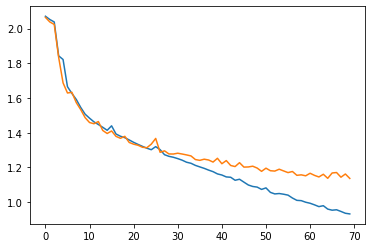

In [15]:
plt.plot(trainer.loss_history[0])
plt.plot(trainer.loss_history[1])

In [16]:
y_prob, y_pred, y_true = trainer.evaluate(valloader1)

In [17]:
# evaluated on test dataset from replica 1
cr = sklearn.metrics.classification_report(y_true, y_pred, target_names=ligands, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
print(cr_df)

              precision    recall  f1-score      support
TNF            0.723668  0.732748  0.728180   797.000000
R84            0.805519  0.808707  0.807110   758.000000
PIC            0.716495  0.719276  0.717883   773.000000
P3K            0.654651  0.716285  0.684083   786.000000
FLA            0.505882  0.490494  0.498069   789.000000
CpG            0.493525  0.445455  0.468259   770.000000
FSL            0.409742  0.367137  0.387271   779.000000
LPS            0.514599  0.577869  0.544402   732.000000
accuracy       0.607212  0.607212  0.607212     0.607212
macro avg      0.603010  0.607246  0.604407  6184.000000
weighted avg   0.603296  0.607212  0.604541  6184.000000


In [18]:
y_prob2, y_pred2, y_true2 = trainer.evaluate(valloader2)

In [19]:
# evaluated on test dataset from replica 1
cr2 = sklearn.metrics.classification_report(y_true2, y_pred2, target_names=ligands, output_dict=True)
cr2_df = pd.DataFrame(cr2).transpose()
print(cr2_df)

              precision    recall  f1-score      support
TNF            0.517473  0.501956  0.509596   767.000000
R84            0.655352  0.655352  0.655352   766.000000
PIC            0.556283  0.533250  0.544523   797.000000
P3K            0.407576  0.348446  0.375698   772.000000
FLA            0.314775  0.386842  0.347107   760.000000
CpG            0.269912  0.234315  0.250857   781.000000
FSL            0.221751  0.199492  0.210033   787.000000
LPS            0.341935  0.421751  0.377672   754.000000
accuracy       0.409605  0.409605  0.409605     0.409605
macro avg      0.410632  0.410175  0.408855  6184.000000
weighted avg   0.410620  0.409605  0.408581  6184.000000


In [21]:
net2 = LSTM(input_size=input_size, hidden_sizes=hidden_size, output_size=output_size, num_layers=1, device=device)

In [22]:
net2.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=9, bias=True)
)

In [23]:
trainer2 = LSTMTrainer(model=net2, device=device)

In [24]:
trainer2.train(trainloader2, valloader2, batch_size=batch_size, n_epochs=epochs)

  1%|█▏                                                                                 | 1/70 [00:04<05:28,  4.76s/it]

Epoch 001: | Training Loss: 2.067720455547859 | Validation Loss: 2.0722058851694323


  3%|██▎                                                                                | 2/70 [00:09<05:15,  4.65s/it]

Epoch 002: | Training Loss: 2.0638398340378683 | Validation Loss: 2.0545023433940925


  4%|███▌                                                                               | 3/70 [00:13<05:07,  4.59s/it]

Epoch 003: | Training Loss: 1.9871883411517088 | Validation Loss: 1.9099151338498617


  6%|████▋                                                                              | 4/70 [00:18<05:02,  4.58s/it]

Epoch 004: | Training Loss: 1.8646487917023145 | Validation Loss: 1.7675417882879985


  7%|█████▉                                                                             | 5/70 [00:22<04:56,  4.57s/it]

Epoch 005: | Training Loss: 1.7217894101965017 | Validation Loss: 1.7028392725384112


  9%|███████                                                                            | 6/70 [00:27<04:52,  4.57s/it]

Epoch 006: | Training Loss: 1.6641677538553874 | Validation Loss: 1.6410761973292558


 10%|████████▎                                                                          | 7/70 [00:32<04:47,  4.56s/it]

Epoch 007: | Training Loss: 1.6461187305121587 | Validation Loss: 1.6237270782903297


 11%|█████████▍                                                                         | 8/70 [00:36<04:42,  4.56s/it]

Epoch 008: | Training Loss: 1.6106857009317683 | Validation Loss: 1.601958584539669


 13%|██████████▋                                                                        | 9/70 [00:41<04:37,  4.56s/it]

Epoch 009: | Training Loss: 1.5862391859635538 | Validation Loss: 1.5745377184189473


 14%|███████████▋                                                                      | 10/70 [00:45<04:33,  4.56s/it]

Epoch 010: | Training Loss: 1.5678250774569895 | Validation Loss: 1.598330119221481


 16%|████████████▉                                                                     | 11/70 [00:50<04:29,  4.57s/it]

Epoch 011: | Training Loss: 1.5461134925655935 | Validation Loss: 1.5306497591058004


 17%|██████████████                                                                    | 12/70 [00:54<04:24,  4.57s/it]

Epoch 012: | Training Loss: 1.5274770717511232 | Validation Loss: 1.525353978589638


 19%|███████████████▏                                                                  | 13/70 [00:59<04:20,  4.57s/it]

Epoch 013: | Training Loss: 1.5052901917490467 | Validation Loss: 1.5005450519089847


 20%|████████████████▍                                                                 | 14/70 [01:04<04:15,  4.56s/it]

Epoch 014: | Training Loss: 1.4870615590577838 | Validation Loss: 1.5075327047367686


 21%|█████████████████▌                                                                | 15/70 [01:08<04:10,  4.56s/it]

Epoch 015: | Training Loss: 1.4670744143683334 | Validation Loss: 1.4706154361213606


 23%|██████████████████▋                                                               | 16/70 [01:13<04:05,  4.55s/it]

Epoch 016: | Training Loss: 1.454757538746143 | Validation Loss: 1.4621986593167806


 24%|███████████████████▉                                                              | 17/70 [01:17<04:01,  4.56s/it]

Epoch 017: | Training Loss: 1.4432117878705606 | Validation Loss: 1.4601379067627425


 26%|█████████████████████                                                             | 18/70 [01:22<03:57,  4.56s/it]

Epoch 018: | Training Loss: 1.4302810891606341 | Validation Loss: 1.4314918714700287


 27%|██████████████████████▎                                                           | 19/70 [01:26<03:52,  4.56s/it]

Epoch 019: | Training Loss: 1.4165721742586157 | Validation Loss: 1.436148041302396


 29%|███████████████████████▍                                                          | 20/70 [01:31<03:47,  4.56s/it]

Epoch 020: | Training Loss: 1.4086437018438318 | Validation Loss: 1.4474762702725597


 30%|████████████████████████▌                                                         | 21/70 [01:35<03:43,  4.56s/it]

Epoch 021: | Training Loss: 1.3974040393171638 | Validation Loss: 1.4472132269869145


 31%|█████████████████████████▊                                                        | 22/70 [01:40<03:38,  4.55s/it]

Epoch 022: | Training Loss: 1.389262304223817 | Validation Loss: 1.4017596281680864


 33%|██████████████████████████▉                                                       | 23/70 [01:44<03:33,  4.55s/it]

Epoch 023: | Training Loss: 1.3806306384075646 | Validation Loss: 1.407263126569925


 34%|████████████████████████████                                                      | 24/70 [01:49<03:29,  4.55s/it]

Epoch 024: | Training Loss: 1.3705809220500376 | Validation Loss: 1.3930763940221256


 36%|█████████████████████████████▎                                                    | 25/70 [01:54<03:24,  4.55s/it]

Epoch 025: | Training Loss: 1.3607862765761627 | Validation Loss: 1.4089448365968527


 37%|██████████████████████████████▍                                                   | 26/70 [01:58<03:20,  4.55s/it]

Epoch 026: | Training Loss: 1.3525467301237173 | Validation Loss: 1.3881184845855556


 39%|███████████████████████████████▋                                                  | 27/70 [02:03<03:15,  4.54s/it]

Epoch 027: | Training Loss: 1.3437307888749002 | Validation Loss: 1.4073213375720781


 40%|████████████████████████████████▊                                                 | 28/70 [02:07<03:10,  4.53s/it]

Epoch 028: | Training Loss: 1.3368184850133698 | Validation Loss: 1.3827398284194397


 41%|█████████████████████████████████▉                                                | 29/70 [02:12<03:05,  4.52s/it]

Epoch 029: | Training Loss: 1.3245688482947733 | Validation Loss: 1.3695339898473209


 43%|███████████████████████████████████▏                                              | 30/70 [02:16<03:00,  4.52s/it]

Epoch 030: | Training Loss: 1.3132608456858272 | Validation Loss: 1.3872769149308353


 44%|████████████████████████████████████▎                                             | 31/70 [02:21<02:56,  4.52s/it]

Epoch 031: | Training Loss: 1.3059995388162546 | Validation Loss: 1.352276515714901


 46%|█████████████████████████████████████▍                                            | 32/70 [02:25<02:51,  4.51s/it]

Epoch 032: | Training Loss: 1.2936735472459904 | Validation Loss: 1.3496719107185442


 47%|██████████████████████████████████████▋                                           | 33/70 [02:30<02:47,  4.52s/it]

Epoch 033: | Training Loss: 1.2875547787923922 | Validation Loss: 1.4326288626366055


 49%|███████████████████████████████████████▊                                          | 34/70 [02:34<02:42,  4.51s/it]

Epoch 034: | Training Loss: 1.2817633448661059 | Validation Loss: 1.3513594681454688


 50%|█████████████████████████████████████████                                         | 35/70 [02:39<02:37,  4.51s/it]

Epoch 035: | Training Loss: 1.2640334030677531 | Validation Loss: 1.3611699342727661


 51%|██████████████████████████████████████████▏                                       | 36/70 [02:43<02:33,  4.51s/it]

Epoch 036: | Training Loss: 1.254848519755506 | Validation Loss: 1.3329122115656273


 53%|███████████████████████████████████████████▎                                      | 37/70 [02:48<02:28,  4.51s/it]

Epoch 037: | Training Loss: 1.2440251225712655 | Validation Loss: 1.3349639324797797


 54%|████████████████████████████████████████████▌                                     | 38/70 [02:52<02:24,  4.52s/it]

Epoch 038: | Training Loss: 1.2352691760008363 | Validation Loss: 1.343740258020224


 56%|█████████████████████████████████████████████▋                                    | 39/70 [02:57<02:20,  4.52s/it]

Epoch 039: | Training Loss: 1.2233406833533582 | Validation Loss: 1.3324299645178097


 57%|██████████████████████████████████████████████▊                                   | 40/70 [03:01<02:15,  4.52s/it]

Epoch 040: | Training Loss: 1.2171100899405862 | Validation Loss: 1.3142206644274526


 59%|████████████████████████████████████████████████                                  | 41/70 [03:06<02:11,  4.52s/it]

Epoch 041: | Training Loss: 1.2147602077188162 | Validation Loss: 1.3113305630143155


 60%|█████████████████████████████████████████████████▏                                | 42/70 [03:10<02:06,  4.52s/it]

Epoch 042: | Training Loss: 1.2009183489728248 | Validation Loss: 1.2966820683675944


 61%|██████████████████████████████████████████████████▎                               | 43/70 [03:15<02:02,  4.52s/it]

Epoch 043: | Training Loss: 1.2099670150499233 | Validation Loss: 1.30367427142625


 63%|███████████████████████████████████████████████████▌                              | 44/70 [03:19<01:57,  4.53s/it]

Epoch 044: | Training Loss: 1.1837920854831565 | Validation Loss: 1.285374485340315


 64%|████████████████████████████████████████████████████▋                             | 45/70 [03:24<01:53,  4.53s/it]

Epoch 045: | Training Loss: 1.1729969581653332 | Validation Loss: 1.2727342137356394


 66%|█████████████████████████████████████████████████████▉                            | 46/70 [03:29<01:48,  4.53s/it]

Epoch 046: | Training Loss: 1.1665390473672714 | Validation Loss: 1.2814705918744667


 67%|███████████████████████████████████████████████████████                           | 47/70 [03:33<01:44,  4.54s/it]

Epoch 047: | Training Loss: 1.154585116074003 | Validation Loss: 1.2647843944657708


 69%|████████████████████████████████████████████████████████▏                         | 48/70 [03:38<01:40,  4.55s/it]

Epoch 048: | Training Loss: 1.1443926828346034 | Validation Loss: 1.2782552918208014


 70%|█████████████████████████████████████████████████████████▍                        | 49/70 [03:42<01:35,  4.54s/it]

Epoch 049: | Training Loss: 1.134730418797197 | Validation Loss: 1.2892399755949826


 71%|██████████████████████████████████████████████████████████▌                       | 50/70 [03:47<01:30,  4.54s/it]

Epoch 050: | Training Loss: 1.1281296968460084 | Validation Loss: 1.2723664518484135


 73%|███████████████████████████████████████████████████████████▋                      | 51/70 [03:51<01:26,  4.54s/it]

Epoch 051: | Training Loss: 1.1273130542930516 | Validation Loss: 1.2462482814936293


 74%|████████████████████████████████████████████████████████████▉                     | 52/70 [03:56<01:21,  4.53s/it]

Epoch 052: | Training Loss: 1.1182775237779508 | Validation Loss: 1.2505405385469652


 76%|██████████████████████████████████████████████████████████████                    | 53/70 [04:00<01:16,  4.53s/it]

Epoch 053: | Training Loss: 1.0993916274487288 | Validation Loss: 1.271480635883882


 77%|███████████████████████████████████████████████████████████████▎                  | 54/70 [04:05<01:12,  4.52s/it]

Epoch 054: | Training Loss: 1.1071901742069201 | Validation Loss: 1.2495505379647325


 79%|████████████████████████████████████████████████████████████████▍                 | 55/70 [04:09<01:07,  4.52s/it]

Epoch 055: | Training Loss: 1.0951739290664937 | Validation Loss: 1.2429143122791015


 80%|█████████████████████████████████████████████████████████████████▌                | 56/70 [04:14<01:03,  4.52s/it]

Epoch 056: | Training Loss: 1.078645090193584 | Validation Loss: 1.229265711356684


 81%|██████████████████████████████████████████████████████████████████▊               | 57/70 [04:18<00:58,  4.51s/it]

Epoch 057: | Training Loss: 1.1036996276899316 | Validation Loss: 1.2458725946465719


 83%|███████████████████████████████████████████████████████████████████▉              | 58/70 [04:23<00:54,  4.51s/it]

Epoch 058: | Training Loss: 1.0832729288216294 | Validation Loss: 1.2227828521089457


 84%|█████████████████████████████████████████████████████████████████████             | 59/70 [04:27<00:49,  4.52s/it]

Epoch 059: | Training Loss: 1.0664671462157678 | Validation Loss: 1.2113379031112514


 86%|██████████████████████████████████████████████████████████████████████▎           | 60/70 [04:32<00:45,  4.52s/it]

Epoch 060: | Training Loss: 1.0454469601313272 | Validation Loss: 1.2130259545807986


 87%|███████████████████████████████████████████████████████████████████████▍          | 61/70 [04:36<00:40,  4.52s/it]

Epoch 061: | Training Loss: 1.044831878220898 | Validation Loss: 1.2235265914926823


 89%|████████████████████████████████████████████████████████████████████████▋         | 62/70 [04:41<00:36,  4.53s/it]

Epoch 062: | Training Loss: 1.0516796542995277 | Validation Loss: 1.2200606213402503


 90%|█████████████████████████████████████████████████████████████████████████▊        | 63/70 [04:45<00:31,  4.53s/it]

Epoch 063: | Training Loss: 1.049629277470468 | Validation Loss: 1.2380842910599463


 91%|██████████████████████████████████████████████████████████████████████████▉       | 64/70 [04:50<00:27,  4.54s/it]

Epoch 064: | Training Loss: 1.0255479937997358 | Validation Loss: 1.1809057968178975


 93%|████████████████████████████████████████████████████████████████████████████▏     | 65/70 [04:55<00:22,  4.54s/it]

Epoch 065: | Training Loss: 1.0139610058959874 | Validation Loss: 1.235724024551431


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 66/70 [04:59<00:18,  4.54s/it]

Epoch 066: | Training Loss: 1.0122827383293502 | Validation Loss: 1.1981091050757575


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 67/70 [05:04<00:13,  4.54s/it]

Epoch 067: | Training Loss: 1.0027732315419735 | Validation Loss: 1.193773871230096


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 68/70 [05:08<00:09,  4.54s/it]

Epoch 068: | Training Loss: 0.9883303531970101 | Validation Loss: 1.2277621983252849


 99%|████████████████████████████████████████████████████████████████████████████████▊ | 69/70 [05:13<00:04,  4.54s/it]

Epoch 069: | Training Loss: 0.9908446688761656 | Validation Loss: 1.2027912606898041


100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [05:17<00:00,  4.54s/it]

Epoch 070: | Training Loss: 0.974344881649675 | Validation Loss: 1.1974593431679244


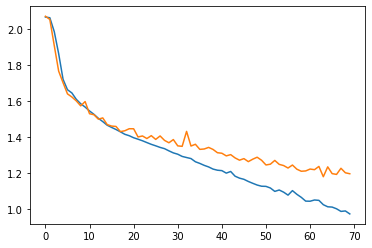

In [25]:
plt.plot(trainer2.loss_history[0])
plt.plot(trainer2.loss_history[1])

In [30]:
y_prob, y_pred, y_true = trainer2.evaluate(valloader2)

In [31]:
cr = sklearn.metrics.classification_report(y_true, y_pred, target_names=ligands, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
print(cr_df)

              precision    recall  f1-score      support
TNF            0.596087  0.675359  0.633252   767.000000
R84            0.779516  0.715405  0.746086   766.000000
PIC            0.723618  0.722710  0.723164   797.000000
P3K            0.652757  0.567358  0.607069   772.000000
FLA            0.484742  0.543421  0.512407   760.000000
CpG            0.530347  0.469910  0.498303   781.000000
FSL            0.428402  0.459975  0.443627   787.000000
LPS            0.535714  0.537135  0.536424   754.000000
accuracy       0.586514  0.586514  0.586514     0.586514
macro avg      0.591398  0.586409  0.587541  6184.000000
weighted avg   0.591631  0.586514  0.587715  6184.000000


In [32]:
y_prob2, y_pred2, y_true2 = trainer2.evaluate(valloader1)

In [33]:
cr2 = sklearn.metrics.classification_report(y_true2, y_pred2, target_names=ligands, output_dict=True)
cr2_df = pd.DataFrame(cr2).transpose()
print(cr2_df)

              precision    recall  f1-score      support
TNF            0.530303  0.614806  0.569436   797.000000
R84            0.721400  0.707124  0.714191   758.000000
PIC            0.526980  0.593790  0.558394   773.000000
P3K            0.444909  0.405852  0.424484   786.000000
FLA            0.332000  0.315589  0.323587   789.000000
CpG            0.257440  0.224675  0.239945   770.000000
FSL            0.209467  0.227214  0.217980   779.000000
LPS            0.361027  0.326503  0.342898   732.000000
accuracy       0.427232  0.427232  0.427232     0.427232
macro avg      0.422941  0.426944  0.423864  6184.000000
weighted avg   0.422728  0.427232  0.423893  6184.000000
